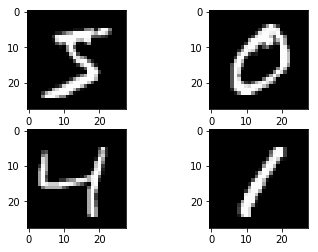

In [3]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset. Keras downloads it automatically
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot. You may need to run this cell twice to succesfully plot the images
plt.show()

In [4]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [5]:
seed = 7
numpy.random.seed(seed)

In [6]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [7]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [8]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [9]:
# define the CNN model
def larger_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 54s 892us/step - loss: 0.3860 - acc: 0.8779 - val_loss: 0.0880 - val_acc: 0.9721
Epoch 2/10
60000/60000 [==============================] - 53s 877us/step - loss: 0.0966 - acc: 0.9702 - val_loss: 0.0537 - val_acc: 0.9829
Epoch 3/10
60000/60000 [==============================] - 53s 881us/step - loss: 0.0683 - acc: 0.9785 - val_loss: 0.0369 - val_acc: 0.9873
Epoch 4/10
60000/60000 [==============================] - 53s 886us/step - loss: 0.0556 - acc: 0.9827 - val_loss: 0.0328 - val_acc: 0.9900
Epoch 5/10
60000/60000 [==============================] - 54s 908us/step - loss: 0.0485 - acc: 0.9851 - val_loss: 0.0369 - val_acc: 0.9882
Epoch 6/10
60000/60000 [==============================] - 53s 886us/step - loss: 0.0414 - acc: 0.9868 - val_loss: 0.0312 - val_acc: 0.9899
Epoch 7/10
60000/60000 [==============================] - 53s 883us/step - loss: 0.0378 - acc: 0.9884 - val_loss: 0.

(83, 61)

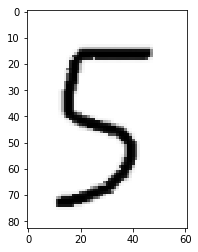

In [26]:
# Save the model
model.save('my_model.h5')
import cv2
# Now we'll load one image to test the trained model
image_pred = cv2.imread("number-five.png",0)
plt.imshow(image_pred, cmap='gray')
image_pred.shape

In [27]:
# Now we reshape the image to fit the model
image2 = cv2.resize(image_pred, (28, 28))
imageaux = image2
num_pixels2 = image2.shape[0] * image2.shape[1]
image2 = image2.reshape(1, 1, 28, 28).astype('float32')

# As the digits of the dataset are white against the black background, we have to do the following operation:
image2 = (255-image2)/255
# If the image is a white digit against dark backgroud, use image2 = image2/255

In [29]:
# Predicts the class and gives the probability that the prediction is correct
pred = model.predict_classes(image2)
pred_proba = model.predict_proba(image2)
pred_proba = "%.2f%%" % (pred_proba[0][pred]*100)
print(pred[0], " with confidence of ", pred_proba)

5  with confidence of  100.00%
